In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [3]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [4]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [5]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [6]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [8]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [9]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [10]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [11]:
# 2. MLP + Sigmoid activation + SGDOptimizer

# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(128, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(64, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 32,645
Trainable params: 32,645
Non-trainable params: 0
_________________________________________________________________

Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.7137 - accuracy: 0.8254 - val_loss: 0.6539 - val_accuracy: 0.8276
Epoch 2/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.6412 - accuracy: 0.8277 - val_loss: 0.6312 - val_accuracy: 0.8276
Epoch 3/500
87554/87554 [========

87554/87554 [==============================] - 2s 19us/step - loss: 0.3666 - accuracy: 0.8984 - val_loss: 0.3690 - val_accuracy: 0.8981
Epoch 50/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.3651 - accuracy: 0.8989 - val_loss: 0.3685 - val_accuracy: 0.9001
Epoch 51/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.3638 - accuracy: 0.8995 - val_loss: 0.3661 - val_accuracy: 0.8991
Epoch 52/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.3623 - accuracy: 0.8997 - val_loss: 0.3648 - val_accuracy: 0.8996
Epoch 53/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.3610 - accuracy: 0.8999 - val_loss: 0.3651 - val_accuracy: 0.8999
Epoch 54/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.3599 - accuracy: 0.9005 - val_loss: 0.3623 - val_accuracy: 0.9005
Epoch 55/500
87554/87554 [==============================] - 1s 14us/step - loss: 0.3584 - accuracy: 0.9011 - val_loss: 

87554/87554 [==============================] - 2s 18us/step - loss: 0.3113 - accuracy: 0.9182 - val_loss: 0.3158 - val_accuracy: 0.9170
Epoch 105/500
87554/87554 [==============================] - 1s 14us/step - loss: 0.3105 - accuracy: 0.9182 - val_loss: 0.3150 - val_accuracy: 0.9174
Epoch 106/500
87554/87554 [==============================] - 1s 15us/step - loss: 0.3096 - accuracy: 0.9187 - val_loss: 0.3155 - val_accuracy: 0.9179
Epoch 107/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.3089 - accuracy: 0.9190 - val_loss: 0.3137 - val_accuracy: 0.9167
Epoch 108/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.3081 - accuracy: 0.9186 - val_loss: 0.3127 - val_accuracy: 0.9175
Epoch 109/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.3072 - accuracy: 0.9189 - val_loss: 0.3119 - val_accuracy: 0.9176
Epoch 110/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.3064 - accuracy: 0.9190 - val_

Epoch 159/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.2697 - accuracy: 0.9265 - val_loss: 0.2763 - val_accuracy: 0.9248
Epoch 160/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.2689 - accuracy: 0.9266 - val_loss: 0.2754 - val_accuracy: 0.9247
Epoch 161/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2682 - accuracy: 0.9269 - val_loss: 0.2748 - val_accuracy: 0.9247
Epoch 162/500
87554/87554 [==============================] - 1s 13us/step - loss: 0.2675 - accuracy: 0.9268 - val_loss: 0.2741 - val_accuracy: 0.9251
Epoch 163/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.2668 - accuracy: 0.9272 - val_loss: 0.2764 - val_accuracy: 0.9257
Epoch 164/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2666 - accuracy: 0.9275 - val_loss: 0.2738 - val_accuracy: 0.9258
Epoch 165/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2656 - accuracy:

87554/87554 [==============================] - 1s 17us/step - loss: 0.2355 - accuracy: 0.9341 - val_loss: 0.2443 - val_accuracy: 0.9328
Epoch 214/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.2350 - accuracy: 0.9345 - val_loss: 0.2428 - val_accuracy: 0.9309
Epoch 215/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2344 - accuracy: 0.9341 - val_loss: 0.2422 - val_accuracy: 0.9314
Epoch 216/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2338 - accuracy: 0.9345 - val_loss: 0.2417 - val_accuracy: 0.9311
Epoch 217/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2332 - accuracy: 0.9346 - val_loss: 0.2410 - val_accuracy: 0.9320
Epoch 218/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2327 - accuracy: 0.9350 - val_loss: 0.2406 - val_accuracy: 0.9318
Epoch 219/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2321 - accuracy: 0.9352 - val_

87554/87554 [==============================] - 1s 15us/step - loss: 0.2073 - accuracy: 0.9436 - val_loss: 0.2156 - val_accuracy: 0.9406
Epoch 268/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.2067 - accuracy: 0.9437 - val_loss: 0.2151 - val_accuracy: 0.9410
Epoch 269/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.2062 - accuracy: 0.9438 - val_loss: 0.2147 - val_accuracy: 0.9410
Epoch 270/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.2057 - accuracy: 0.9440 - val_loss: 0.2142 - val_accuracy: 0.9413
Epoch 271/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.2053 - accuracy: 0.9442 - val_loss: 0.2159 - val_accuracy: 0.9430
Epoch 272/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.2052 - accuracy: 0.9441 - val_loss: 0.2134 - val_accuracy: 0.9413
Epoch 273/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.2044 - accuracy: 0.9444 - val_

Epoch 322/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.1841 - accuracy: 0.9508 - val_loss: 0.1931 - val_accuracy: 0.9473
Epoch 323/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.1837 - accuracy: 0.9508 - val_loss: 0.1924 - val_accuracy: 0.9481
Epoch 324/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.1833 - accuracy: 0.9508 - val_loss: 0.1929 - val_accuracy: 0.9483
Epoch 325/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.1831 - accuracy: 0.9511 - val_loss: 0.1918 - val_accuracy: 0.9482
Epoch 326/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.1826 - accuracy: 0.9513 - val_loss: 0.1920 - val_accuracy: 0.9474
Epoch 327/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.1823 - accuracy: 0.9512 - val_loss: 0.1924 - val_accuracy: 0.9511
Epoch 328/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.1821 - accuracy:

87554/87554 [==============================] - 2s 20us/step - loss: 0.1668 - accuracy: 0.9558 - val_loss: 0.1764 - val_accuracy: 0.9545
Epoch 377/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.1665 - accuracy: 0.9558 - val_loss: 0.1790 - val_accuracy: 0.9507
Epoch 378/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.1670 - accuracy: 0.9555 - val_loss: 0.1750 - val_accuracy: 0.9531
Epoch 379/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.1660 - accuracy: 0.9558 - val_loss: 0.1747 - val_accuracy: 0.9538
Epoch 380/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.1657 - accuracy: 0.9558 - val_loss: 0.1744 - val_accuracy: 0.9539
Epoch 381/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.1653 - accuracy: 0.9561 - val_loss: 0.1792 - val_accuracy: 0.9546
Epoch 382/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.1657 - accuracy: 0.9563 - val_

87554/87554 [==============================] - 1s 17us/step - loss: 0.1527 - accuracy: 0.9591 - val_loss: 0.1627 - val_accuracy: 0.9561
Epoch 431/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.1526 - accuracy: 0.9592 - val_loss: 0.1619 - val_accuracy: 0.9574
Epoch 432/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.1523 - accuracy: 0.9593 - val_loss: 0.1615 - val_accuracy: 0.9572
Epoch 433/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.1520 - accuracy: 0.9594 - val_loss: 0.1612 - val_accuracy: 0.9575
Epoch 434/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.1518 - accuracy: 0.9595 - val_loss: 0.1610 - val_accuracy: 0.9571
Epoch 435/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.1516 - accuracy: 0.9594 - val_loss: 0.1608 - val_accuracy: 0.9571
Epoch 436/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.1513 - accuracy: 0.9595 - val_

Epoch 485/500
87554/87554 [==============================] - 2s 26us/step - loss: 0.1411 - accuracy: 0.9620 - val_loss: 0.1550 - val_accuracy: 0.9604
Epoch 486/500
87554/87554 [==============================] - 2s 27us/step - loss: 0.1414 - accuracy: 0.9620 - val_loss: 0.1509 - val_accuracy: 0.9603
Epoch 487/500
87554/87554 [==============================] - 2s 28us/step - loss: 0.1408 - accuracy: 0.9620 - val_loss: 0.1506 - val_accuracy: 0.9598
Epoch 488/500
87554/87554 [==============================] - 2s 25us/step - loss: 0.1406 - accuracy: 0.9621 - val_loss: 0.1509 - val_accuracy: 0.9595
Epoch 489/500
87554/87554 [==============================] - 2s 27us/step - loss: 0.1404 - accuracy: 0.9620 - val_loss: 0.1502 - val_accuracy: 0.9607
Epoch 490/500
87554/87554 [==============================] - 2s 24us/step - loss: 0.1402 - accuracy: 0.9623 - val_loss: 0.1500 - val_accuracy: 0.9606
Epoch 491/500
87554/87554 [==============================] - 2s 27us/step - loss: 0.1400 - accuracy:

In [12]:
y_pred = model_sigmoid.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18118
           1       0.94      0.52      0.67       556
           2       0.91      0.84      0.87      1448
           3       0.68      0.25      0.37       162
           4       0.98      0.90      0.94      1608

    accuracy                           0.96     21892
   macro avg       0.90      0.70      0.77     21892
weighted avg       0.96      0.96      0.96     21892



Test score: 0.14833274375046276
Test accuracy: 0.9604878425598145


<IPython.core.display.Javascript object>


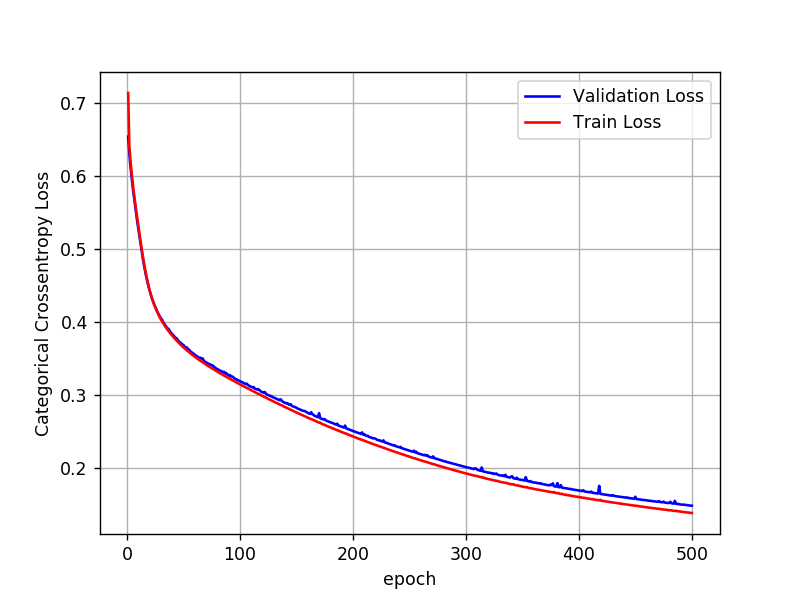

In [13]:
score = model_sigmoid.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [14]:
#              precision    recall  f1-score   support

#           0       0.96      1.00      0.98     18118
#           1       0.94      0.52      0.67       556
#           2       0.91      0.84      0.87      1448
#           3       0.68      0.25      0.37       162
#           4       0.98      0.90      0.94      1608

#    accuracy                           0.96     21892
#   macro avg       0.90      0.70      0.77     21892
#weighted avg       0.96      0.96      0.96     21892

#Test score: 0.14833274375046276
#Test accuracy: 0.9604878425598145